### <span style="color:purple">  Importing Necessary Libraries and Files

In [1]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import time
import itertools
from nltk import FreqDist
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from bs4 import BeautifulSoup 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy import spatial
%matplotlib inline
D1 = pd.read_csv('D1.csv')
D2 = pd.read_csv('D2.csv')
D2 = pd.DataFrame(D2.head(10000))  # Due to System constraints only selecting 10,000 records

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Due to System constraints D2 File has only selecting 10,000 records for analysis

###  <span style="color:purple"> Function for Pre Processing 

In [2]:
def preprocessing(File):
    start_time = time.time()
    corpus=[]
    for i in range(0,len(File)): 
        review=BeautifulSoup(File[i]).get_text()
        review= re.sub('[^a-zA-Z]',' ',review)
        review=review.lower().split()
        review=[word for word in review if not word in set(stopwords.words('english'))]
        review=' '.join(review)
        corpus.append(review)
    end_time = time.time()
    return(start_time,end_time,corpus)

###  <span style="color:purple"> Function for creating Corpus

In [3]:
def corpus(File):
    start_time = time.time()
    corpus=[]
    for i in range(0,len(File)): 
        review=File[i]
        review=review.lower().split()
        corpus.append(review)
    end_time = time.time()
    return(start_time,end_time,corpus)

###  <span style="color:purple"> Function for displaying multiple graphs / tables together

In [4]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

### <span style="color:purple">  Calling function for Preprocessing for File1 - D1.CSV

In [5]:
start_time ,end_time,D1['Body'] = preprocessing(D1['Body'])
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 242.06763887405396 seconds


### <span style="color:purple">  Calling function for Preprocessing for File2 - D2.CSV

In [6]:
start_time ,end_time,D2['Body'] = preprocessing(D2['Body'])
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 554.2600145339966 seconds


# <span style="color: BLUE">  Generate Statistics About Each Data set 

### <span style="color:purple">   D1.csv - Simple Statistics Around Count  and Uniqueness
    

In [7]:
D1.describe()

,Title,Body
count,3126,3126
unique,3125,3126
top,Can someone suggest me a platform to develop a...,person studies neural networks anything relate...
freq,2,1


### <span style="color:purple">   D2.csv - Simple Statistics Around Count  and Uniqueness
    

In [8]:
D2.describe()

,Title,Body
count,10000,10000
unique,9998,9999
top,Samsung S Galaxy II (i9100): possible with sto...,market new smartphone except iphone new field ...
freq,2,2


### <span style="color:purple">   Creating Additional Columns to generate more statistics for both the files

In [9]:
D1['Title_Length'] = D1['Title'].apply(len)
D1['Body_Length'] = D1['Body'].apply(len)
D2['Title_Length'] = D2['Title'].apply(len)
D2['Body_Length'] = D2['Body'].apply(len)
D1['Title_Word_count'] = D1['Title'].str.split().apply(len)
D1['Body_Word_count'] = D1['Body'].str.split().apply(len)
D2['Title_Word_count'] = D2['Title'].str.split().apply(len)
D2['Body_Word_count'] = D2['Body'].str.split().apply(len)

### <span style="color:purple">   Statistics for Length and Word Count for both columns for D1.CSV

In [10]:
display_side_by_side(pd.DataFrame(D1.Title_Length.describe()),pd.DataFrame(D1.Body_Length.describe()),pd.DataFrame(D1.Title_Word_count.describe()),pd.DataFrame(D1.Body_Word_count.describe()))

,Title_Length
count,3126.000000
mean,59.736724
std,23.524940
min,15.000000
25%,43.000000
50%,57.000000
75%,73.000000
max,150.000000
,Body_Length
count,3126.000000


### <span style="color:purple">   Histograms for Length and Word Count for both columns for D1.CSV

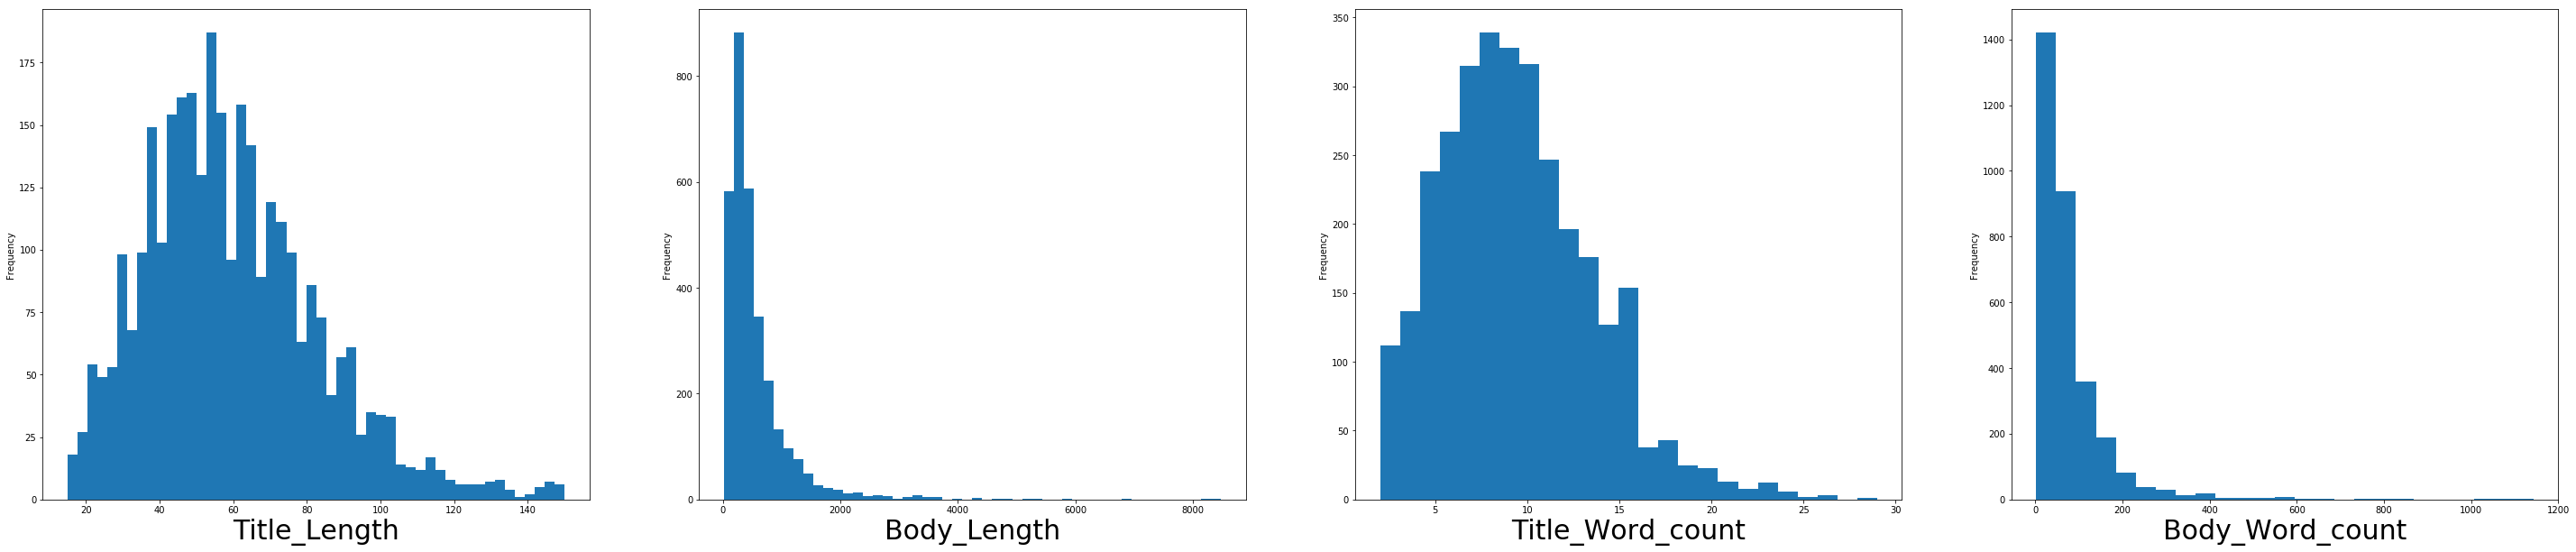

In [21]:
plt.figure(figsize=(50, 10))
plt.subplot(1, 4, 1)
D1['Title_Length'].plot(bins=50, kind='hist')
plt.xlabel('Title_Length',fontsize=30)
plt.subplot(1, 4, 2)
D1['Body_Length'].plot(bins=50, kind='hist')
plt.xlabel('Body_Length',fontsize=30)
plt.subplot(1, 4,3)
D1['Title_Word_count'].plot(bins=25, kind='hist')
plt.xlabel('Title_Word_count',fontsize=30)
plt.subplot(1, 4, 4)
D1['Body_Word_count'].plot(bins=25, kind='hist')
plt.xlabel('Body_Word_count',fontsize=30)
plt.show()

### <span style="color:purple">   Statistics for Length and Word Count for both columns for D2.CSV

In [12]:
display_side_by_side(pd.DataFrame(D2.Title_Length.describe()),pd.DataFrame(D2.Body_Length.describe()),pd.DataFrame(D2.Title_Word_count.describe()),pd.DataFrame(D2.Body_Word_count.describe()))

,Title_Length
count,10000.000000
mean,53.624000
std,19.377992
min,15.000000
25%,40.000000
50%,51.000000
75%,65.000000
max,149.000000
,Body_Length
count,10000.000000


### <span style="color:purple">   Histograms for Length and Word Count for both columns for D2.CSV

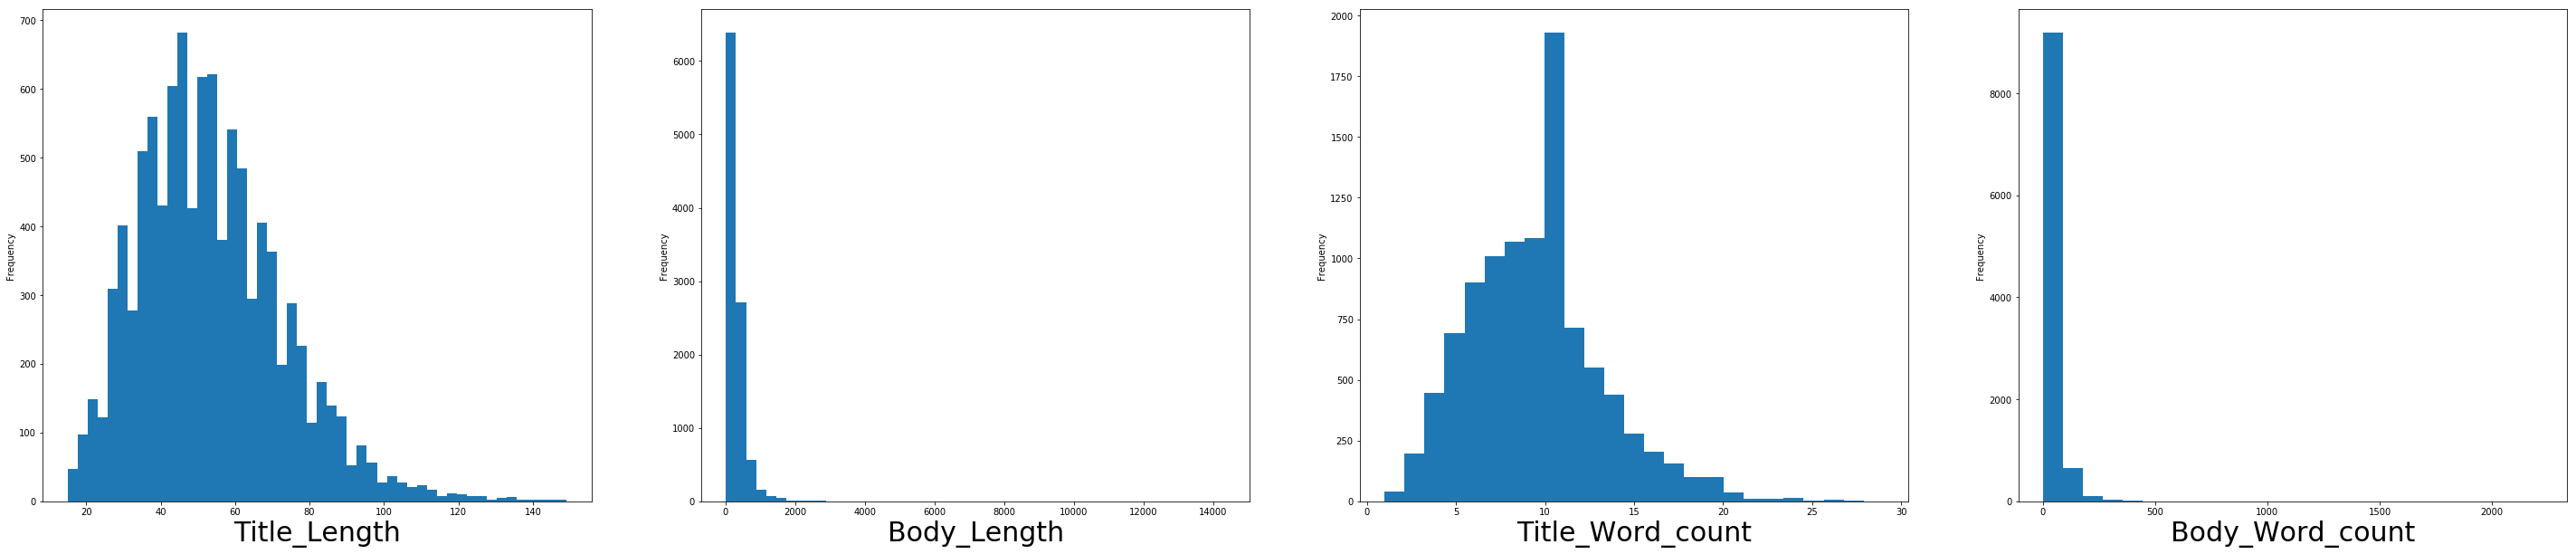

In [22]:
plt.figure(figsize=(50, 10))
plt.subplot(1, 4, 1)
D2['Title_Length'].plot(bins=50, kind='hist') 
plt.xlabel('Title_Length',fontsize=30)
plt.subplot(1, 4, 2)
D2['Body_Length'].plot(bins=50, kind='hist') 
plt.xlabel('Body_Length',fontsize=30)
plt.subplot(1, 4,3)
D2['Title_Word_count'].plot(bins=25, kind='hist')
plt.xlabel('Title_Word_count',fontsize=30)
plt.subplot(1, 4, 4)
D2['Body_Word_count'].plot(bins=25, kind='hist')
plt.xlabel('Body_Word_count',fontsize=30)
plt.show()

### <span style="color:purple">  Calling function for creating corpus for File1- D1.CSV

In [24]:
start_time ,end_time,corpus_Title = corpus(D1['Title']) 
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))
start_time ,end_time,corpus_Body = corpus(D1['Body']) 
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 0.10693359375 seconds
The Execution Time of the pre processing is 0.09480595588684082 seconds


### <span style="color:purple">  Frequent terms for File1 - D1.csv

In [26]:
#Frequent Terms
term_list=list(itertools.chain.from_iterable(corpus_Title))
freq_terms_corpus_Title = FreqDist(term_list)
term_list=list(itertools.chain.from_iterable(corpus_Body))
freq_terms_corpus_Body = FreqDist(term_list)
display_side_by_side(pd.DataFrame(freq_terms_corpus_Title.most_common(10)), pd.DataFrame(freq_terms_corpus_Body.most_common(10)))

,0,1
0,to,940
1,the,918
2,a,799
3,of,746
4,in,681
5,how,608
6,is,593
7,for,505
8,what,430
9,and,406


### <span style="color:purple">  Calling function for creating corpus for File2- D2.CSV

In [16]:
start_time ,end_time,corpus_Title = corpus(D2['Title']) 
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))
start_time ,end_time,corpus_Body = corpus(D2['Body']) 
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 0.1149287223815918 seconds
The Execution Time of the pre processing is 0.12496662139892578 seconds


### <span style="color:purple">  Frequent terms for File2 - D2.csv

In [17]:
term_list=list(itertools.chain.from_iterable(corpus_Title))
freq_terms_corpus_Title = FreqDist(term_list)
term_list=list(itertools.chain.from_iterable(corpus_Body))
freq_terms_corpus_Body = FreqDist(term_list)
display_side_by_side(pd.DataFrame(freq_terms_corpus_Title.most_common(10)),pd.DataFrame(freq_terms_corpus_Body.most_common(10)))

,0,1
0,to,3645
1,how,2638
2,the,2310
3,i,2249
4,on,1902
5,android,1863
6,a,1834
7,my,1644
8,can,1560
9,is,1393
